In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
dv=pd.read_csv("Crude Oil Prices Daily.csv")

In [30]:
dv.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [31]:
dv.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [32]:
dv.dropna(axis=0,inplace=True)

In [33]:
dv.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [34]:
dv_oil=dv.reset_index()['Closing Value']

In [35]:
dv_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dv_oil=scaler.fit_transform(np.array(dv_oil).reshape(-1,1))


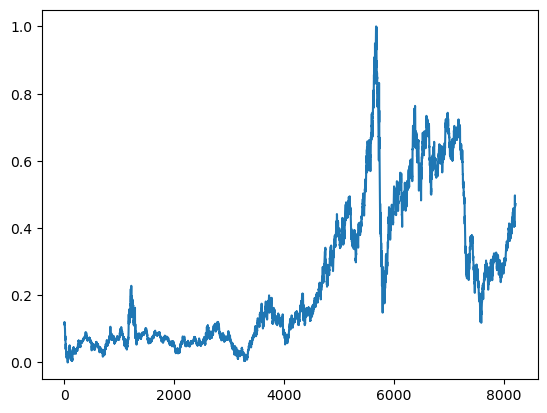

In [37]:
plt.plot(dv_oil)

In [38]:
training_size=int(len(dv_oil)*0.65)
test_size=len(dv_oil)-training_size
train_data,test_data=dv_oil[0:training_size,:],dv_oil[training_size:len(dv_oil),:1]

In [39]:
training_size,test_size

(5340, 2876)

In [40]:
train_data.shape

(5340, 1)

In [41]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX), np.array(dataY) 

In [50]:
time_step = 10
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [51]:
print(x_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [52]:
print(x_test.shape), print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [53]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [54]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

# Importing The Model Building Libraries

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Initializing The Model

In [56]:
model= Sequential()

# Adding LSTM Layers

In [57]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

# Adding Output Layers

In [58]:
model.add(Dense(1))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Configure The Learning Process


In [60]:
model.compile(loss='mean_squared_error',optimizer='adam')

# Train The Model


In [62]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 1s 14ms/step - loss: 1.2397e-04 - val_loss: 0.0010
Epoch 2/50
84/84 [==============================] - 1s 14ms/step - loss: 1.2604e-04 - val_loss: 0.0011
Epoch 3/50
84/84 [==============================] - 1s 13ms/step - loss: 1.2418e-04 - val_loss: 0.0010
Epoch 4/50
84/84 [==============================] - 1s 15ms/step - loss: 1.1566e-04 - val_loss: 6.9560e-04
Epoch 5/50
84/84 [==============================] - 1s 14ms/step - loss: 1.1687e-04 - val_loss: 8.6428e-04
Epoch 6/50
84/84 [==============================] - 1s 14ms/step - loss: 1.3380e-04 - val_loss: 8.0826e-04
Epoch 7/50
84/84 [==============================] - 1s 14ms/step - loss: 1.0896e-04 - val_loss: 8.1868e-04
Epoch 8/50
84/84 [==============================] - 1s 14ms/step - loss: 1.0808e-04 - val_loss: 6.2760e-04
Epoch 9/50
84/84 [==============================] - 1s 14ms/step - loss: 1.1460e-04 - val_loss: 7.0855e-04
Epoch 10/50
84/84 [==============================

# Model Evaluation


In [65]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
### Calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

# Save The Model


In [66]:
from tensorflow.keras.models import load_model

In [67]:
model.save("crude_oil.hs")

INFO:tensorflow:Assets written to: crude_oil.hs\assets


INFO:tensorflow:Assets written to: crude_oil.hs\assets


# Test The Model


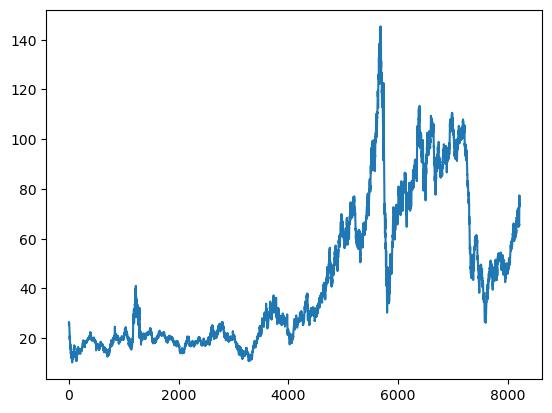

In [68]:
### Plotting
look_back=10
trainpredictPlot = np.empty_like(dv_oil)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictplot = np.empty_like(dv_oil)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dv_oil))
plt.show()

In [69]:
len(test_data)

2876

In [70]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [71]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [72]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [73]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
#print(temp_input)
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] #print(temp_input)
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.47315055]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47315055]
1 day output [[0.47494358]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47315055 0.47494358]
2 day output [[0.47638887]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47315055 0.47494358 0.47638887]
3 day output [[0.47733274]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47315055 0.47494358 0.47638887 0.47733274]
4 day output [[0.47806898]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47315055
 0.47494358 0.47638887 0.47733274 0.47806898]
5 day output [[0.47860423]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47315055 0.47494358
 0.47638887 0.47733274 0.47806898 0.47860423]
6 day output [[0.47904986]]
7 day input [0.46497853 0.47038353 0.47149415 0.47315055 0.4749435

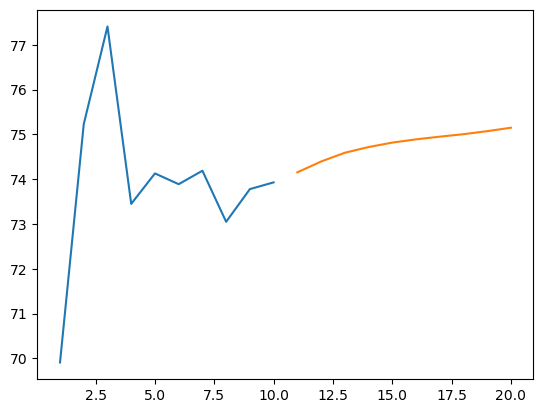

In [74]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(dv_oil)
plt.plot(day_new, scaler.inverse_transform(dv_oil[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

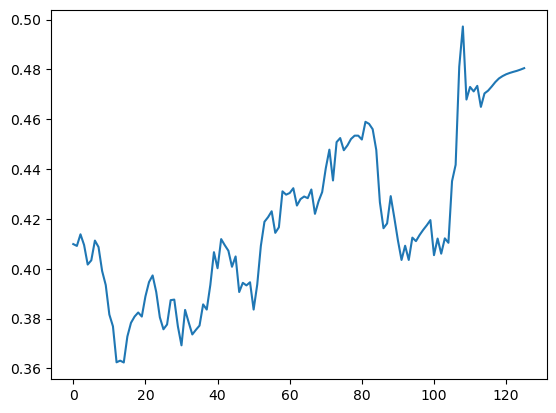

In [75]:
df3=dv_oil.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

In [76]:
df3=scaler.inverse_transform(df3).tolist()

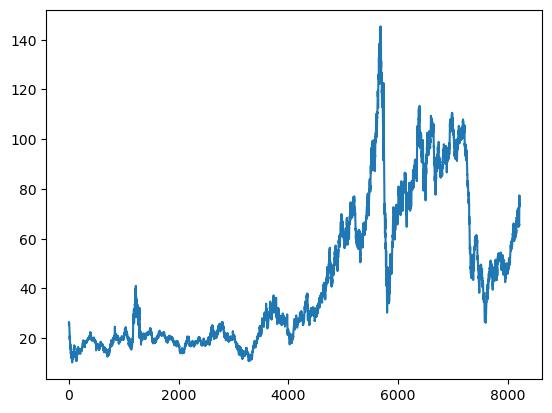

In [77]:
plt.plot(scaler.inverse_transform(dv_oil))